In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noSolar_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Precipitation (mm),WindSpeed (m/s),AirTemp (DegC),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,0.000,1.23,24.20,84.90,-0.1
1,164.833333,0.031719,0.136486,0.000,0.79,23.30,88.40,-0.1
2,164.875000,0.031719,0.136486,0.000,0.60,22.80,90.50,-0.1
3,164.916667,0.031719,0.060883,0.000,0.48,22.60,91.50,-0.1
4,164.958333,0.040201,0.049905,1.766,0.72,22.60,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0.000,0.81,2.29,101.16,-0.1
2443,267.291667,0.000000,0.000000,0.000,0.76,2.33,101.20,0.0
2444,267.333333,0.000000,0.000000,0.017,0.88,2.12,101.22,0.0
2445,267.375000,0.000000,0.000000,0.000,0.76,1.91,101.22,0.0


In [8]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 200000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [9]:
data = np.loadtxt("noSolar_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [10]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[-0.05702366]
 [ 0.46601477]
 [-0.2777552 ]
 [ 0.17363289]
 [ 0.13382606]
 [ 0.06495716]
 [ 0.33772218]] 
 w2:
 [[ 0.24211803]
 [ 0.852166  ]
 [-0.53962266]
 [-0.28205806]
 [-0.04282381]
 [ 0.09288438]
 [ 0.30710113]] 
 bias: 0.47087952 
 loss: 755350.3 

step: 20000 
 w1:
 [[-0.00094804]
 [ 0.4205064 ]
 [-0.5246872 ]
 [-0.10319798]
 [ 0.43098804]
 [ 0.00576619]
 [ 0.00240754]] 
 w2:
 [[ 0.10216153]
 [ 0.85825723]
 [-0.85912687]
 [-0.5922132 ]
 [ 0.18192203]
 [-0.17974855]
 [-0.00679254]] 
 bias: 0.20049168 
 loss: 453.00232 

step: 30000 
 w1:
 [[-0.00014221]
 [-0.02000148]
 [ 0.0400446 ]
 [ 0.02777743]
 [ 0.04467763]
 [ 0.0099509 ]
 [ 0.00051656]] 
 w2:
 [[ 0.04018076]
 [ 0.40708542]
 [-0.31165373]
 [-0.1980587 ]
 [-0.14810883]
 [-0.32300344]
 [-0.04959298]] 
 bias: 0.090604015 
 loss: 0.27270284 

step: 40000 
 w1:
 [[-0.00010004]
 [-0.00851722]
 [ 0.01566495]
 [-0.00373332]
 [ 0.0392968 ]
 [ 0.00657919]
 [ 0.00045425]] 
 w2:
 [[ 0.03134203]
 [ 0.19993474]
 [-0.1

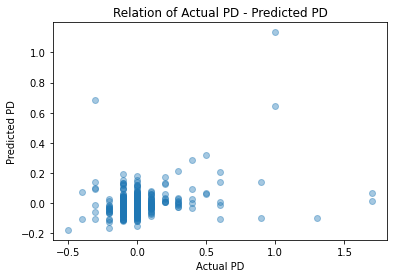

In [11]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [12]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.17194596
MAE: 0.087502986
